<h1 style="text-align: center;"> TC3006C: Inteligencia artificial avanzada para la ciencia de datos I</h1>
<p></p>
<div style="text-align: center;"> <em>Transformation and scaling</em> </div>

https://www.listendata.com/2017/04/how-to-standardize-variable-in-regression.html

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Loading data

url = 'https://drive.google.com/file/d/14cl3aR2tkp3BzpUQqpeDZ7j6X9MEQFX7/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id

main_cols = ['Calories','Carbohydrates','Total_Fat','Protein','Sodium','Sugars']

tmp = pd.read_csv(dwn_url)
tmp = tmp.rename(columns={'Total Fat':'Total_Fat'})

tmp[main_cols].head(2)

,Calories,Carbohydrates,Total_Fat,Protein,Sodium,Sugars
0,300,31,13.0,17,750,3
1,250,30,8.0,18,770,3


## 1. Transformations

- In linear regression, the normality assumption of the errors implies normal distribution for the target variable
- If the **target variable** is not normal (e.g. not symmetric) [power transformations](https://en.wikipedia.org/wiki/Power_transform) can help

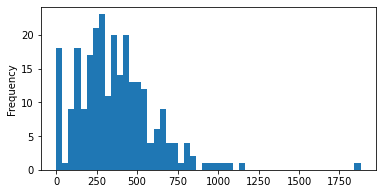

In [7]:
tmp['Calories'].plot(kind='hist',bins=50, figsize=(6,3))
plt.show()

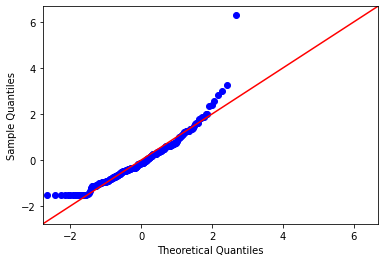

In [4]:
import statsmodels.api as sm
cal = (tmp['Calories']-tmp['Calories'].mean())/tmp['Calories'].std()
sm.qqplot(cal, line='45')
plt.show()


https://statisticaloddsandends.wordpress.com/2021/02/19/the-box-cox-and-yeo-johnson-transformations-for-continuous-variables/

In [8]:
# Yeo-Johnson transformation

transformed, lbda = stats.yeojohnson(tmp['Calories'])
tmp['tCalo'] = transformed

In [9]:
lbda

0.576536217539834

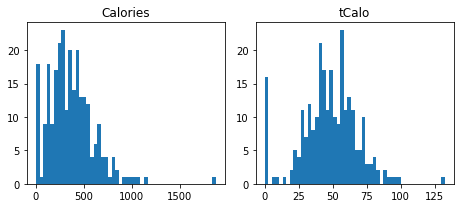

In [10]:
fig = plt.figure(figsize=(6.5,3))

for i,col in enumerate(['Calories','tCalo']):
    fig.add_subplot(1,2,i+1)
    plt.hist(tmp[col].values, 50)
    plt.title(col)

plt.tight_layout()
plt.show()

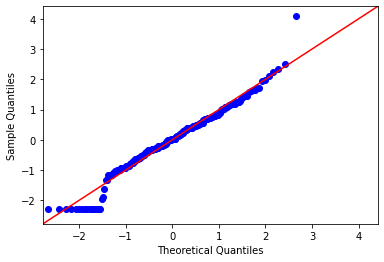

In [11]:
import statsmodels.api as sm
tcal = (tmp['tCalo']-tmp['tCalo'].mean())/tmp['tCalo'].std()
sm.qqplot(tcal, line='45')
plt.show()


- Power transform can cause a loss of interpretability 
- If we use the moel for predictions, the value of the predicted $y$ must be tranformed back to the original variable

- By transforming the target variable, original linear associations between the target and the predictive variables may be affected 

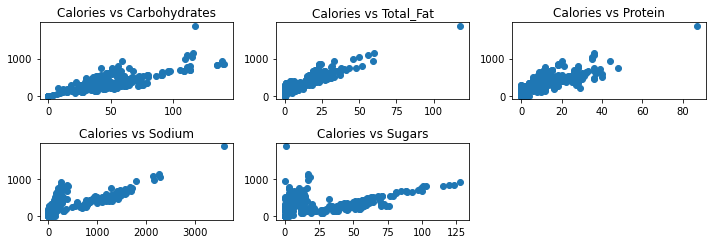

In [ ]:
fig = plt.figure(figsize=(10,3.5))

for i,col in enumerate(['Carbohydrates','Total_Fat','Protein','Sodium','Sugars']):
    fig.add_subplot(2,3,i+1)
    plt.scatter(x=tmp[col].values, y=tmp['Calories'].values)
    plt.title('Calories vs ' + col)

plt.tight_layout()
plt.show()

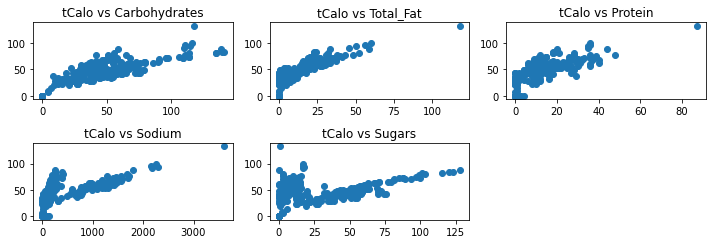

In [ ]:
fig = plt.figure(figsize=(10,3.5))

for i,col in enumerate(['Carbohydrates','Total_Fat','Protein','Sodium','Sugars']):
    fig.add_subplot(2,3,i+1)
    plt.scatter(x=tmp[col].values, y=tmp['tCalo'].values)
    plt.title('tCalo vs ' + col)

plt.tight_layout()
plt.show()

- If it is the case, then we have to transform the predictive variables in order to restore linearity (if previously exists)
- Common transformations are $\mathrm{log}(x)$, $1/x$, $\sqrt{x}$

- One can use Power transformations also for the predictive variables

- loss of interpretability

In [ ]:
# Applying sqrt(x)

for col in ['Total_Fat','Protein','Sodium','Sugars']:
    tmp['t'+col[0:4]] = np.sqrt(tmp[col])

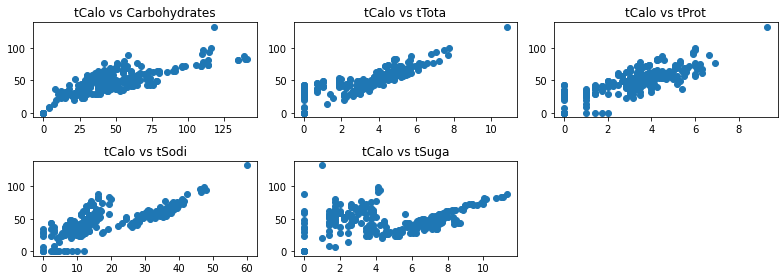

In [ ]:
fig = plt.figure(figsize=(11,4))

for i,col in enumerate(['Carbohydrates','tTota','tProt','tSodi','tSuga']):
    fig.add_subplot(2,3,i+1)
    plt.scatter(x=tmp[col].values, y=tmp['tCalo'].values)
    plt.title('tCalo vs ' + col)

plt.tight_layout()
plt.show()

## 2. Scaling

In [ ]:
tmp[main_cols].describe().T[['mean','std','min','max']]

,mean,std,min,max
Calories,368.269231,240.269886,0.0,1880.0
Carbohydrates,47.346154,28.252232,0.0,141.0
Total_Fat,14.165385,14.205998,0.0,118.0
Protein,13.338462,11.426146,0.0,87.0
Sodium,495.750000,577.026323,0.0,3600.0
Sugars,29.423077,28.679797,0.0,128.0


In [ ]:
for col in main_cols:
    tmp['z_'+col] = (tmp[col] - tmp[col].mean()) / tmp[col].std()

In [ ]:
tmp[[col for col in tmp.columns if 'z_' in col]].describe().T[['mean','std','min','max']]

,mean,std,min,max
z_Calories,-1.249001e-17,1.0,-1.532732,6.291803
z_Carbohydrates,8.155869e-17,1.0,-1.675838,3.314919
z_Total_Fat,1.095278e-16,1.0,-0.997141,7.309209
z_Protein,-1.449695e-16,1.0,-1.167363,6.446753
z_Sodium,-2.344279e-16,1.0,-0.859146,5.379737
z_Sugars,-7.980796e-16,1.0,-1.025917,3.437156


Standardized variables with z scores (normalized) will have the same mean, but they do not lie in any particular interval.

## Min-Max scaling

Standardized values with min-max scaling lie in the same interval [0,1], but they don't have the same mean and standard deviation.

$X_{scaled}=\frac{X-X_{min}}{X_{max}-X_{min}}$

In [ ]:
for col in main_cols:
    tmp['minmax_'+col] = (tmp[col]-tmp[col].min())/ (tmp[col].max()-tmp[col].min())

In [ ]:
tmp[[col for col in tmp.columns if 'minmax_' in col]].describe().T[['mean','std','min','max']]

,mean,std,min,max
minmax_Calories,0.195888,0.127803,0.0,1.0
minmax_Carbohydrates,0.335788,0.200370,0.0,1.0
minmax_Total_Fat,0.120046,0.120390,0.0,1.0
minmax_Protein,0.153316,0.131335,0.0,1.0
minmax_Sodium,0.137708,0.160285,0.0,1.0
minmax_Sugars,0.229868,0.224061,0.0,1.0


In [ ]:
tmp['minmax_Carbohydrates']

0      0.219858
1      0.212766
2      0.205674
3      0.212766
4      0.212766
         ...   
255    0.567376
256    0.751773
257    0.375887
258    0.808511
259    0.404255
Name: minmax_Carbohydrates, Length: 260, dtype: float64

## Standard deviation method

If we want our variables to have equal standard deviation, but different ranges and means, we can divide each value by the standard deviation:

$X_{scaled}=\frac{X}{std(X)}$

## Centering

A constant value is subtracted from every value of a variable. The constant value can be average, min or max. 

In [ ]:
for col in main_cols:
    tmp['centered_'+col] = (tmp[col]-tmp[col].mean())

In [ ]:
tmp[[col for col in tmp.columns if 'centered_' in col]].describe().T[['mean','std','min','max']]

,mean,std,min,max
centered_Calories,1.399223e-14,240.269886,-368.269231,1511.730769
centered_Carbohydrates,1.749028e-15,28.252232,-47.346154,93.653846
centered_Total_Fat,0.000000e+00,14.205998,-14.165385,103.834615
centered_Protein,-8.745141e-16,11.426146,-13.338462,73.661538
centered_Sodium,0.000000e+00,577.026323,-495.750000,3104.250000
centered_Sugars,3.498057e-15,28.679797,-29.423077,98.576923


Scaling variables is important in PCA and all the methods based on the measure of distances, as Clustering,KNN, SVM, NN, Regression. 

In algorithms based on decision trees scaling is not crucial.